## installing

In [ ]:
pip install tse-option

## importing

In [1]:
import tse_option as tso

## using (1)
با استفاده از تابع زیر، تمامی اختیار معامله های موجود روی سهم مورد نظر شما در خروجی نمایش داده می شود.
#### اختیار معامله های موجود روی سهم خساپا 1401/9/9

In [2]:
df = tso.pricing_based_on_stock(stock_name="خساپا", trading_days=100, IV=True, leverage=True, P_BSM=False, sort="Maturity")
df.head() #sorted by time to maturity

Stock Price: 2032 	RiskFreeRate: 25.78% 	HV: 38.16%


,Strike Price,Status,Maturity(day),Open Interest,Bid,Ask,Delta,IV,Leverage,BSM
Symbol,,,,,,,,,,
ضسپا12111,3250,OTM,91,0,102,103,0.02,%87.0,0.39,3
ضسپا12131,1300,ITM,91,0,0,0,1.0,%-,inf,814
ضسپا12121,1200,ITM,91,0,200,0,1.0,%-,inf,908
ضسپا12141,1400,ITM,91,0,750,840,0.99,%115.1,2.39,722
ضسپا12021,1700,ITM,91,0,490,575,0.91,%85.4,3.22,456


In [4]:
df = tso.pricing_based_on_stock(stock_name="خساپا", trading_days=100, IV=True, leverage=True, P_BSM=False, sort="Strike Price")
df.head() #sorted by strike price

Stock Price: 2032 	RiskFreeRate: 25.78% 	HV: 38.16%


,Strike Price,Status,Maturity(day),Open Interest,Bid,Ask,Delta,IV,Leverage,BSM
Symbol,,,,,,,,,,
ضسپا12121,1200,ITM,91,0,200,0,1.0,%-,inf,908
ضسپا12131,1300,ITM,91,0,0,0,1.0,%-,inf,814
ضسپا30181,1400,ITM,196,0,300,0,0.98,%-,inf,821
ضسپا12141,1400,ITM,91,0,750,840,0.99,%115.1,2.39,722
ضسپا30191,1500,ITM,196,0,0,0,0.96,%-,inf,740


علاوه بر موارد فوق می توان مرتب سازی را براساس تعداد موقعیت های باز هر اختیار معامله انجام داد

همچنین می توان با تغییراتی در آرگومان های ورودی، نمایش برخی از ستون ها را غیرفعال کرد. این قابلیت برای ستون هایی همچون "تلاطم ضمنی"، "اهرم" و "نسبت قیمت بازار به قیمت بلک-شولز" وجود دارد.

In [5]:
#Strike Price = قیمت اعمال

#Status = وضعیت در سود یا ضرر بودن اختیار معامله

#Maturity(day) = زمان تا سررسید

#Open Interest = تعداد موقعیت های باز

#Bid = بهترین قیمت پیشنهادی برای خرید

#Ask = بهترین قیمتم پیشنهادی برای فروش

#Delta = دلتای اختیار معامله

#IV = تلاطم ضمنی

#Leverage = اهرم اختیار معامله

#BSM = قیمت تئوری اختیار معامله براساس مدل بلک-شولز-مرتون

#%Price/BSM = نسبت قیمت بازار به قیمت بلک-شولز -مرتون

## using (2)

با استفاده از تابع زیر، اطلاعات یک اختیار معامله خاص به شما نمایش داده می شود.

#### اطلاعات اختیار معامله ضسپا1205 1401/9/9

In [7]:
df = tso.pricing_based_on_option(option_name="ضسپا1205", trading_days=100, IV=True, leverage=False, P_BSM=True)
df

Stock Price: 2032	RiskFreeRate: 25.79%	HV: 38.16%


,Strike Price,Status,Maturity(day),Open Interest,Bid,Ask,Delta,IV,BSM,%Price/BSM
Symbol,,,,,,,,,,
ضسپا12051,2000,ATM,91,0,359,366,0.7,%71.9,241,%-51.9🔴


ستون "نسبت قیمت بازار به قیمت بلک-شولز" بیانگر میزان overvalue یا undervalue بودن اختیار را نشان می دهد.

**توجه**: کلیه خروجی این ماژول از جمله قیمت گذاری و محاسبه تلاطم ضمنی و ... به جهت تسهیل در تصمیم گیری سرمایه گذاران است و هیچگونه پیشنهادی برای خرید یا فروش آن محسوب نمی شود.

## using (3)

با استفاده از تابع زیر می توان تاریخچه نمادهای بازار بورس و فرابورس را دریافت کرد. لازم به یادآوری است که این تابع دارای قابلیت ارائه قیمت های تعدیل شده سهام را نیز هست.

در صورتی که تمایل دارید، دیتافریم تاریخچه قیمت از را در بازه خاصی از تاریخ مشاهده کنید میتوانید همانند مثال های زیر عمل کنید.


**نکته**: اگر تمایل دارید که از تاریخ جلالی جهت اسلایسینگ استفاده کنید لازم است که مقدار j_date را برابر True قرار دهید

In [2]:
df = tso.download_history(symbol='خودرو', j_date=True, start="1401-01-01")
df

,Open,High,Low,Close,Volume,JDate
Date,,,,,,
2022-03-26,2517.0,2517.0,2400.0,2474.0,1216916657,1401-01-06 00:00:00
2022-03-27,2419.0,2580.0,2390.0,2506.0,1189151897,1401-01-07 00:00:00
2022-03-28,2450.0,2619.0,2441.0,2554.0,1172187240,1401-01-08 00:00:00
2022-03-29,2590.0,2600.0,2427.0,2459.0,1158765837,1401-01-09 00:00:00
2022-03-30,2400.0,2548.0,2375.0,2471.0,962901083,1401-01-10 00:00:00
...,...,...,...,...,...,...
2023-01-28,3080.0,3099.0,2922.0,2990.0,643534786,1401-11-08 00:00:00
2023-01-29,2951.0,2995.0,2841.0,2851.0,982553586,1401-11-09 00:00:00
2023-01-30,2850.0,2925.0,2757.0,2837.0,711228006,1401-11-10 00:00:00


In [3]:
df = tso.download_history(symbol='خودرو', j_date=True, start="1401-01-01", adjust_price=True)
df

,Open,High,Low,Close,Volume,JDate,Adj Open,Adj High,Adj Low,Adj Close
Date,,,,,,,,,,
2022-03-26,2517.0,2517.0,2400.0,2474.0,1216916657,1401-01-06 00:00:00,2517,2517,2400,2474
2022-03-27,2419.0,2580.0,2390.0,2506.0,1189151897,1401-01-07 00:00:00,2419,2580,2390,2506
2022-03-28,2450.0,2619.0,2441.0,2554.0,1172187240,1401-01-08 00:00:00,2450,2619,2441,2554
2022-03-29,2590.0,2600.0,2427.0,2459.0,1158765837,1401-01-09 00:00:00,2590,2600,2427,2459
2022-03-30,2400.0,2548.0,2375.0,2471.0,962901083,1401-01-10 00:00:00,2400,2548,2375,2471
...,...,...,...,...,...,...,...,...,...,...
2023-01-28,3080.0,3099.0,2922.0,2990.0,643534786,1401-11-08 00:00:00,3080,3099,2922,2990
2023-01-29,2951.0,2995.0,2841.0,2851.0,982553586,1401-11-09 00:00:00,2951,2995,2841,2851
2023-01-30,2850.0,2925.0,2757.0,2837.0,711228006,1401-11-10 00:00:00,2850,2925,2757,2837


### رسم نمودار شمعی براساس خروچی تابع download_history()

In [ ]:
%pip install mplfinance

In [4]:
import mplfinance as mpf

##### رسم نمودار تعدیل نشده

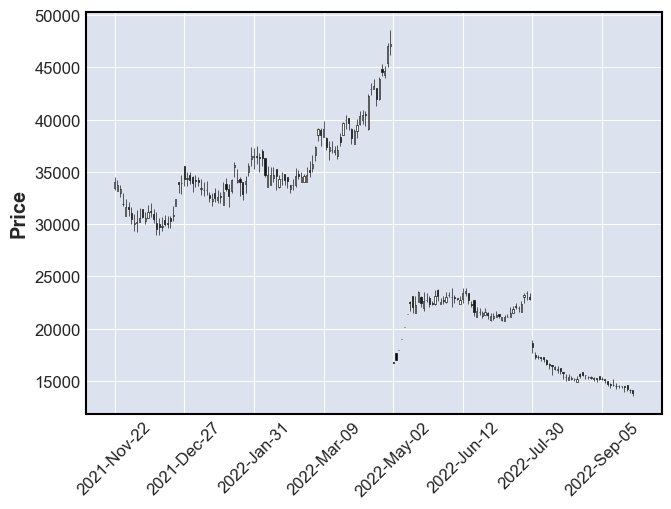

In [6]:
df = tso.download_history("شبریز", j_date=True, start="1400-09-01", end="1401-06-31")
mpf.plot(df, type='candle') #رسم نمودار تعدیل نشده

##### رسم نمودار تعدیل شده

برای رسم نمودار تعدیل شده با ماژول mplfinance می بایست علاوه بر فعال کردن خروجی تعدیل شده، مقدار drop_unadjusted را برابر True قرار داد

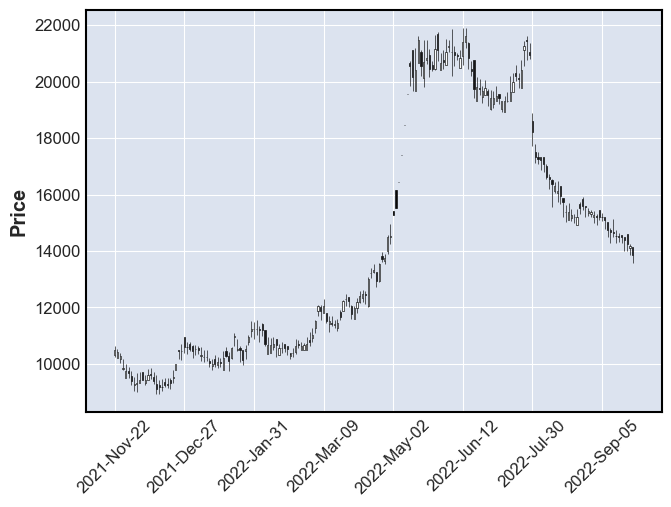

In [7]:
df = tso.download_history("شبریز", j_date=True, start="1400-09-01", end="1401-06-31", adjust_price=True, drop_unadjusted=True)
mpf.plot(df, type='candle') #رسم نمودار تعدیل شده

علاوه بر قابلیت دریافت تاریخچه سهام، شما می توانید تاریخچه قیمت اختیار معامله های مختلف را نیز دریافت کنید

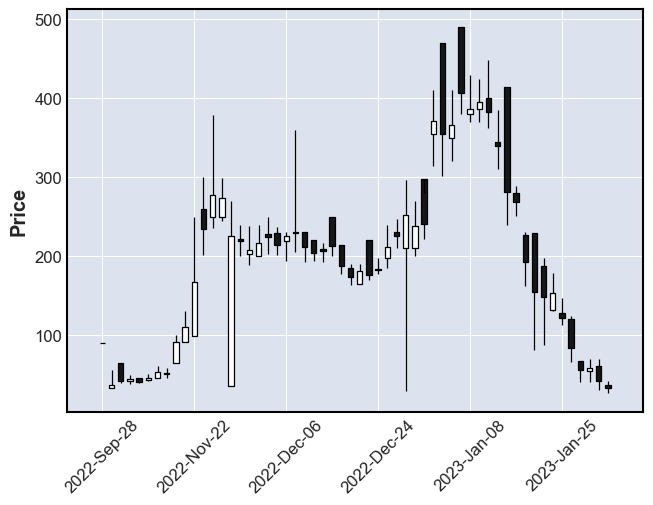

In [8]:
df = tso.download_history("ضسپا1208")
mpf.plot(df, type='candle')